In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
import itertools
import matplotlib.pylab as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html
pca = PCA()
forest = RandomForestClassifier()
pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])

In [3]:
data = pd.DataFrame(np.random.uniform(-10,10,size=(600,10)),columns=('a','b','c','d','e','f','g','h','i','k'))

In [4]:
data.head()

,a,b,c,d,e,f,g,h,i,k
0,-6.975063,-8.639810,9.905240,2.537248,4.600287,5.986374,-1.895711,3.616799,-0.334904,7.690668
1,-8.173671,-3.332056,-2.966859,0.221637,-4.428412,5.118407,-2.434755,6.084626,-4.258314,-0.792674
2,-7.839110,4.608530,5.734487,-7.714968,-3.166604,-4.166475,-9.034782,7.403135,-5.383500,7.127606
3,-4.402820,9.679962,-6.628587,-0.979633,9.797952,-6.594648,-2.377396,6.522417,8.979405,6.975809
4,-5.860315,0.425290,5.089906,3.804448,-2.430835,-1.990738,-7.800777,-7.216583,-0.058480,7.845675


In [5]:
X = data[data.columns.difference(['k'])]
Y = pd.qcut(data['k'],q=5,labels=[1,2,3,4,5]).astype(int)

In [14]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=21)
Y_train, Y_test = train_test_split(Y, test_size=0.2, random_state=21)

In [7]:
pca.fit(X_train.as_matrix())

PCA(copy=True, n_components=None, whiten=False)

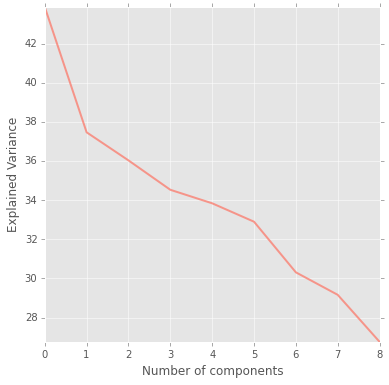

In [8]:
plt.figure(1, figsize=(6, 6))
plt.plot(pca.explained_variance_, linewidth=2, c='salmon', alpha=0.8)
plt.axis('tight')
plt.xlabel('Number of components');
plt.ylabel('Explained Variance');

In [9]:
#check parameters for GridSearchCV using estimator.get_params().keys()
n_components = [1,2,3,4,5,6,7]
max_features = ['auto','sqrt','log2']
criterion = ['gini','entropy']
n_estimators = [3,6,9]
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,
                    forest__n_estimators=n_estimators, forest__criterion=criterion,
                    forest__max_features=max_features),iid=True,cv=5,refit=True)

In [10]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'forest__max_features': ['auto', 'sqrt', 'log2'], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7], 'forest__n_estimators': [3, 6, 9], 'forest__criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

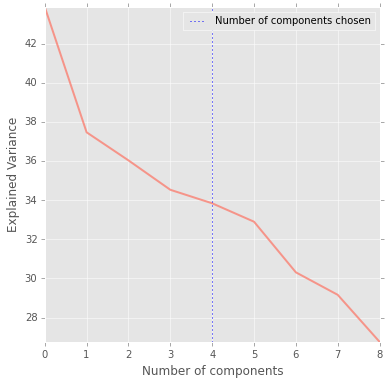

In [11]:
plt.figure(1, figsize=(6, 6))
plt.plot(pca.explained_variance_, linewidth=2, c='salmon', alpha=0.8)
plt.axis('tight')
plt.xlabel('Number of components');
plt.ylabel('Explained Variance');
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='Number of components chosen')
plt.legend(prop=dict(size=10))
plt.show()

In [12]:
print estimator.best_estimator_
print estimator.best_params_

Pipeline(steps=[('pca', PCA(copy=True, n_components=4, whiten=False)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
{'forest__max_features': 'sqrt', 'pca__n_components': 4, 'forest__n_estimators': 6, 'forest__criterion': 'entropy'}
